In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [3]:
def history_plot(history):
    fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(10, 5))

    axs[0].plot(history.history['loss'], label='loss')
    #axs[0].plot(history.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend()
    axs[1].plot(history.history['accuracy'], label='accuracy')
    #axs[1].plot(history.history['val_accuracy'], label='val_accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend()
    plt.show()

def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:,0]) - 1, max(X[:,0]) + 1)
    y_span = np.linspace(min(X[:,1]) - 1, max(X[:,1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel() # flattened
    grid = np.c_[xx_, yy_] # concat
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

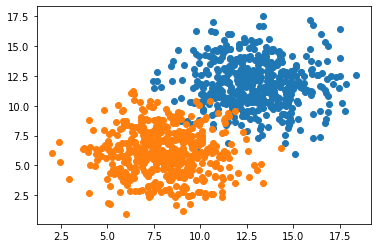

In [17]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [18]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(learning_rate = 0.1 )
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(x=X, y=y, verbose=1, batch_size=100,epochs=75, shuffle='true')

Epoch 1/75
10/10 [==============================] - 0s 2ms/step - loss: 1.9969 - accuracy: 0.5100
Epoch 2/75
10/10 [==============================] - 0s 3ms/step - loss: 1.0551 - accuracy: 0.5160
Epoch 3/75
10/10 [==============================] - 0s 4ms/step - loss: 0.7082 - accuracy: 0.5900
Epoch 4/75
10/10 [==============================] - 0s 3ms/step - loss: 0.5985 - accuracy: 0.6500
Epoch 5/75
10/10 [==============================] - 0s 3ms/step - loss: 0.5444 - accuracy: 0.7060
Epoch 6/75
10/10 [==============================] - 0s 3ms/step - loss: 0.5054 - accuracy: 0.7590
Epoch 7/75
10/10 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.7720
Epoch 8/75
10/10 [==============================] - 0s 3ms/step - loss: 0.4343 - accuracy: 0.8140
Epoch 9/75
10/10 [==============================] - 0s 3ms/step - loss: 0.4074 - accuracy: 0.8710
Epoch 10/75
10/10 [==============================] - 0s 3ms/step - loss: 0.3770 - accuracy: 0.8880
Epoch 11/75
10/10 [

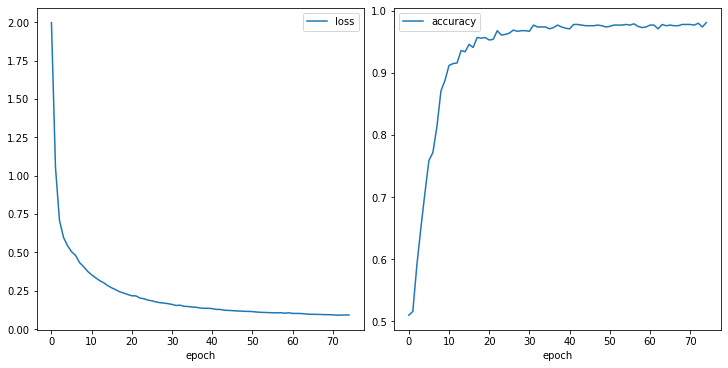

In [20]:
history_plot(history)

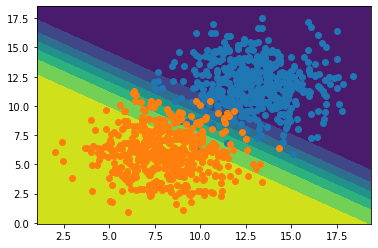

In [21]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

prediction is:  [[0.99178165]]


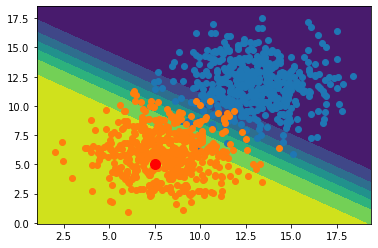

In [22]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

x = 7.5
y = 5

point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ",prediction)